In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('CO2.csv', sep=';', encoding = 'latin-1')
df.head()


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


In [5]:
#Information générale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

In [12]:
#Modalité des variables:

print(df['Marque'].value_counts())
print(df['Carburant'].value_counts())
print(df['Carburant'].value_counts())
print(df['Hybride'].value_counts())
print(df['Boîte de vitesse'].value_counts())
print(df['Champ V9'].value_counts())
print(df['gamme'].value_counts())

Marque
MERCEDES-BENZ                38450
VOLKSWAGEN                     900
FIAT                           607
OPEL                           586
BMW                            525
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
MAZDA                          193
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
HYUNDAI                         52
SMART                           52
LANCIA       

In [8]:
# Les types de variables
df.dtypes.value_counts()

object     13
float64    10
int64       3
Name: count, dtype: int64

In [13]:
#Nombre de valeurs manquantes par colonne
print(df.isnull().sum(axis=0))
#Nombre de valeurs manquantes par ligne
print(df.isnull().sum(axis=1))
print('\n')
#Nombre total de valeurs manquantes
print('Nombre total valeur manquante:',df.isnull().values.sum())

Marque                                      0
Modèle dossier                              0
Modèle UTAC                                 0
Désignation commerciale                     0
CNIT                                        0
Type Variante Version (TVV)                 0
Carburant                                   0
Hybride                                     0
Puissance administrative                    0
Puissance maximale (kW)                     0
Boîte de vitesse                            0
Consommation urbaine (l/100km)             42
Consommation extra-urbaine (l/100km)       42
Consommation mixte (l/100km)               39
CO2 (g/km)                                 39
CO type I (g/km)                          303
HC (g/km)                               34447
NOX (g/km)                                303
HC+NOX (g/km)                           10659
Particules (g/km)                        3142
masse vide euro min (kg)                    0
masse vide euro max (kg)          

In [19]:
#% global de valeurs manquantes
NBNAN=df.isnull().values.sum()
NBVALM=df.count().sum()
PourcentageNAN=(NBNAN/(NBNAN+NBVALM))*100
print('Nombre de NAN:',NBNAN, 'Nombre de valeur non manquantes:', NBVALM, '% de NAN:', PourcentageNAN,'%')
#Colonnes contenant valeur manquantes
print(df.isna().any(axis=0).sum(),'colonnes contenant valeurs manquantes \n')
print(df.isna().any(axis=0).sum(),'colonnes contenant valeurs manquantes \n')
print(df.isna().any(axis=1).sum(), 'lignes contenant valeur manquantes \n')
print(df.isna().sum(axis=0).idxmax(),'colonne contenant le plus de valeurs manquantes \n')

Nombre de NAN: 49251 Nombre de valeur non manquantes: 1116849 % de NAN: 4.223565731926936 %
10 colonnes contenant valeurs manquantes 

10 colonnes contenant valeurs manquantes 

44809 lignes contenant valeur manquantes 

HC (g/km) colonne contenant le plus de valeurs manquantes 



In [20]:
# Description
df.describe()

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg)
count,44850.000000,44850.000000,44808.000000,44808.000000,44811.000000,44811.000000,44547.000000,10403.000000,44547.000000,34191.000000,41708.000000,44850.000000,44850.000000
mean,11.018997,124.780834,9.706744,6.567634,7.716254,198.910892,0.153461,0.030499,0.311837,0.224788,0.000961,2070.961650,2169.545284
std,5.554475,49.158804,2.366181,1.196234,1.597110,39.014678,0.138984,0.018408,0.463112,0.041681,0.006469,342.872975,410.600541
min,1.000000,10.000000,0.000000,2.800000,1.200000,27.000000,0.005000,0.008000,0.001000,0.038000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.300000,7.200000,187.000000,0.046000,0.008000,0.158000,0.201000,0.000000,1976.000000,2043.500000
50%,10.000000,120.000000,9.800000,6.700000,7.700000,203.000000,0.093000,0.031000,0.197000,0.220000,0.001000,2076.000000,2185.000000
75%,11.000000,125.000000,10.700000,7.100000,8.400000,221.000000,0.222000,0.044000,0.228000,0.248000,0.001000,2256.000000,2355.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,0.968000,0.143000,1.846000,0.306000,0.610000,3115.000000,3115.000000


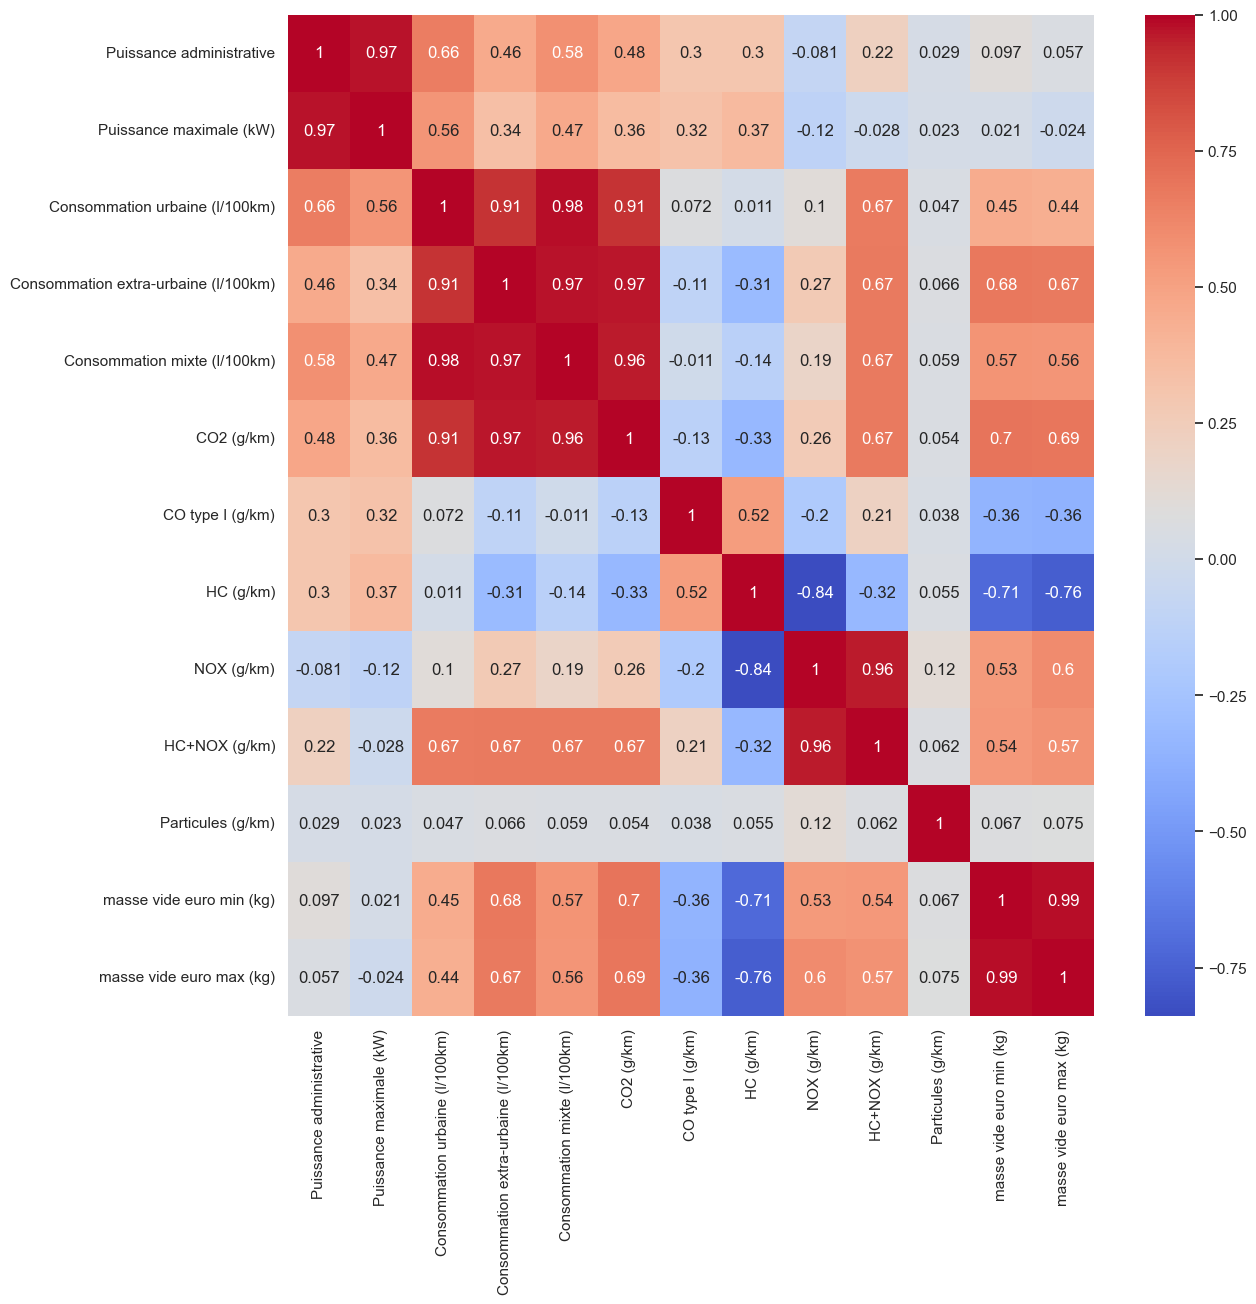

In [22]:
#Réaliser un heatmap pour étudier la corrélation des variables

sns.set()
var_num=df.select_dtypes(include=['int64','float64'])
cor=var_num.corr()
fig,ax=plt.subplots(figsize=(13,13))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')
plt.show()

In [24]:
#Etude des doublons
df.duplicated()
#Nombre de doulons
print('Nombre total des doublons:',df.duplicated().sum())

Nombre total des doublons: 619


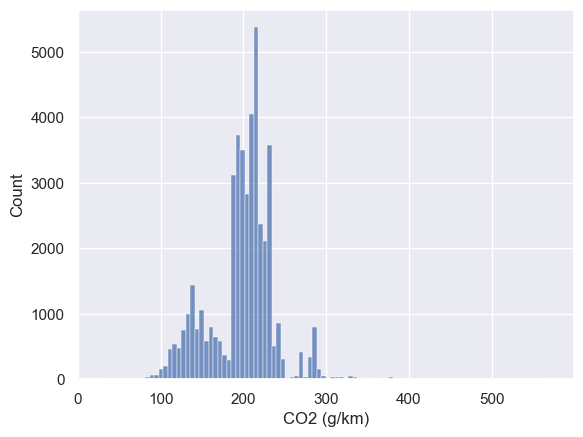

In [25]:
#Distribution CO2 dans le fichier "CO2":

sns.histplot(df['CO2 (g/km)'],bins =100);

C:\Users\chau\AppData\Local\Temp\ipykernel_15696\2574784204.py:1: DtypeWarning: Columns (2,3,8,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('data.csv',sep=',', header=0, index_col=0)


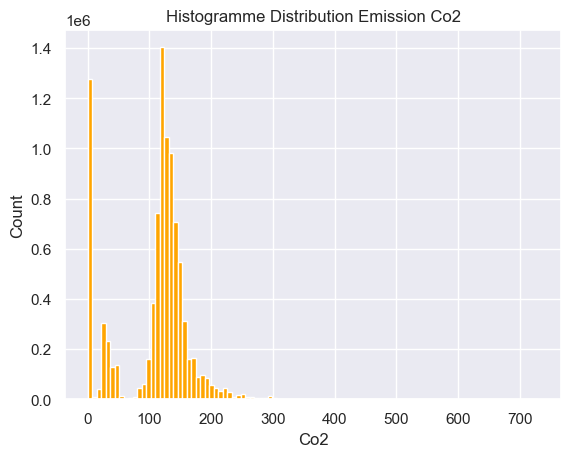

In [26]:
#Graphique sur la distribution de CO2 dans le fichier "data":
data=pd.read_csv('data.csv',sep=',', header=0, index_col=0)
data.head()

plt.hist(data['Ewltp (g/km)'], bins=100, color='orange')
plt.xlabel('Co2')
plt.ylabel('Count')
plt.title('Histogramme Distribution Emission Co2');
plt.show()

C:\Users\chau\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


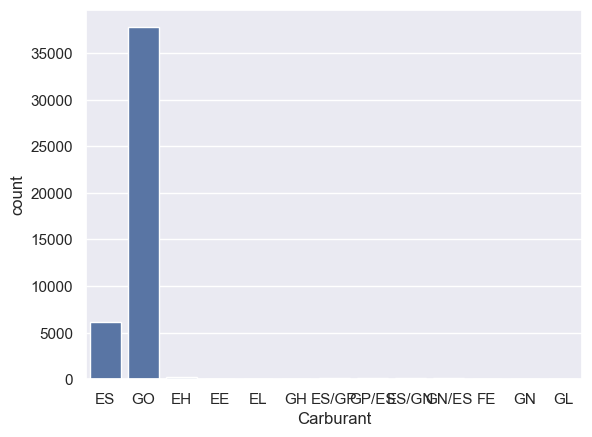

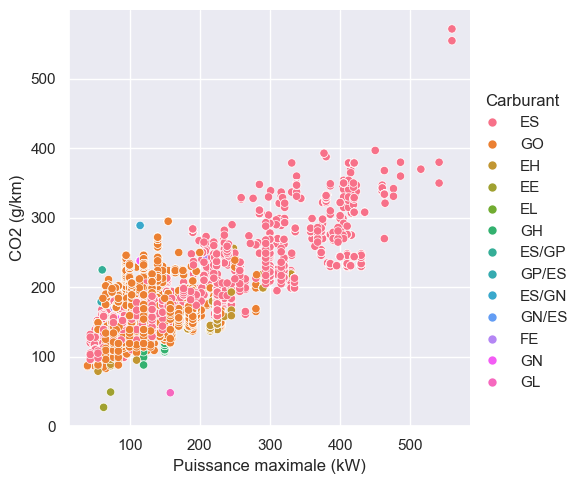

In [27]:
#Graphique sur la distribution de carburant
sns.countplot(x='Carburant',data=df)
sns.relplot(x = "Puissance maximale (kW)", y = "CO2 (g/km)", hue = "Carburant", data = df);

C:\Users\chau\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


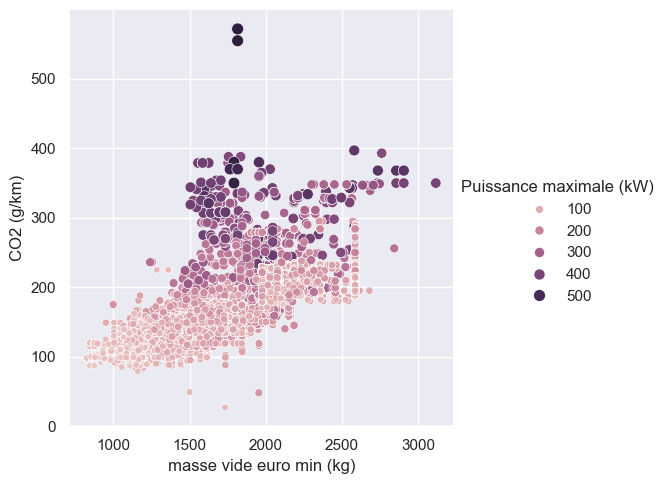

In [29]:
 #Graphique sur la masse et CO2:
sns.relplot(x='masse vide euro min (kg)',y = "CO2 (g/km)",size="Puissance maximale (kW)", hue="Puissance maximale (kW)",data=df);

C:\Users\chau\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


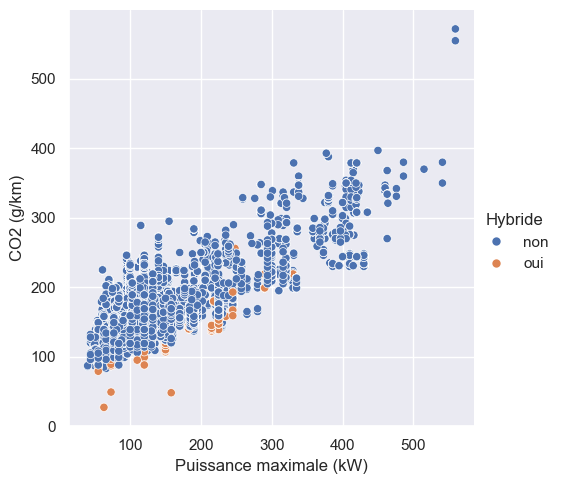

In [30]:
#Graphique sur la distribution de catégorie hybride/non
sns.relplot(x = "Puissance maximale (kW)", y = "CO2 (g/km)", hue = "Hybride", data = df);

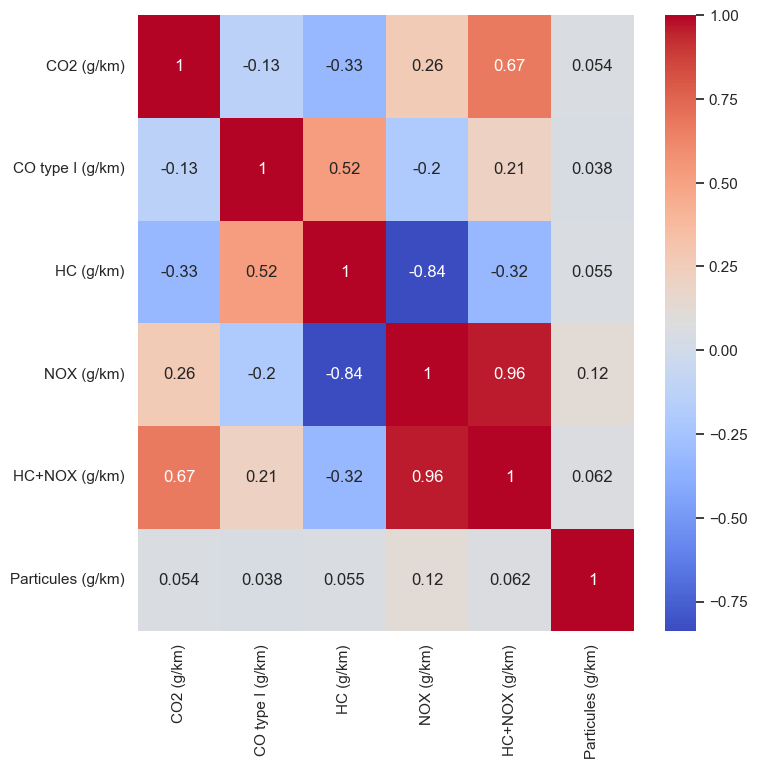

In [31]:
#Corrélation C02 et autres polluants
df1=df.iloc[:,14:20]
cor=df1.corr()
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cor, annot=True,ax=ax,cmap='coolwarm')
plt.show()